In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = data.iloc[ : , 1: -1].values 
y = data.iloc[: , -1].values

In [71]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

#### Feature Scaling is done in SVR

When y takes super high values with respect to X make sure you scale y too

In [65]:
# Do not scale dummy variables in the feature
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

We have to make y a matrix before scaling it

In [7]:

y = y.reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Make sure you create another object for y so it does not bring the mean from the first object

In [8]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### SVR Training

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # always use rbf
regressor.fit(X_scaled, y_scaled) # train on the scaled model
# ignore the 1-d error

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predict the X

In [10]:
y_pred_scaled = regressor.predict(X_scaled)
y_pred_scaled = y_pred_scaled.reshape(-1, 1) # so it can be easily get the inverse
y_pred_scaled


array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

#### Getting the inverse

In [11]:
X_scaled_inverse = sc_X.inverse_transform(X_scaled)
X_scaled_inverse

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [12]:
y_scaled_inverse = sc_y.inverse_transform(y_scaled)
y_scaled_inverse

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

In [115]:
y_pred_inverse = sc_y.inverse_transform(y_pred_scaled) # this is 2d
y_pred = y_pred_inverse.flatten() # this will transform from 2d to 1d
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

Predict salary for 6.5

In [14]:
# scale the the valued

x_sample_scaled = sc_X.transform([[6.5]])
x_sample_scaled

array([[0.34815531]])

In [15]:
# use the scaled value to get the predict scaled value
y_sample_pred_scaled = regressor.predict(x_sample_scaled)
y_sample_pred_scaled = y_sample_pred_scaled.reshape(-1, 1) # so it can be transformed 
y_sample_pred_scaled

array([[-0.27861589]])

In [17]:
# Get the inverse 

y_sample_inverse = sc_y.inverse_transform(y_sample_pred_scaled)
y_sample_inverse = y_sample_inverse.flatten() # change to 1d
y_sample_inverse

array([170370.0204065])

### Visualizing the SVR

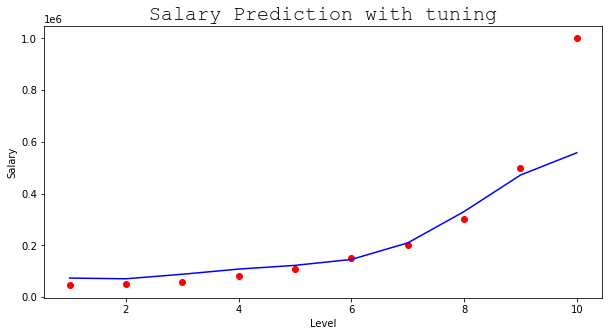

In [56]:
plt.scatter(X, y, color='red') 

plt.plot(X, y_pred, color='blue') 


plt.title('Salary Prediction with tuning', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Level')
plt.ylabel('Salary')

plt.rcParams['figure.figsize'] = 10, 5

plt.show()

In [90]:
print(np.concatenate((y_pred.reshape(-1,1), y.reshape(-1,1)),1))

[[  73474.15615697   45000.        ]
 [  70786.94584626   50000.        ]
 [  88213.00902103   60000.        ]
 [ 108254.98574956   80000.        ]
 [ 122574.52250599  110000.        ]
 [ 145503.10688572  150000.        ]
 [ 209410.23132923  200000.        ]
 [ 330606.89204569  300000.        ]
 [ 471671.95587315  500000.        ]
 [ 557821.75899897 1000000.        ]]


### Better Resolution

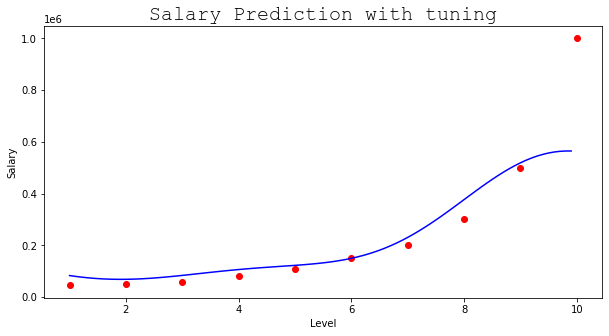

In [120]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)

X_grid_scaled = sc_X.fit_transform(X_grid)

y_grid_pred_scaled = regressor.predict(X_grid_scaled)
y_grid_pred_scaled = y_grid_pred_scaled.reshape(-1, 1)

y_grid_pred_inverse = sc_y.inverse_transform(y_grid_pred_scaled)
y_grid_pred_inverse = y_grid_pred_inverse.flatten()


plt.scatter(X, y, color='red') 

plt.plot(X_grid, y_grid_pred_inverse, color='blue')  # number of x must be equal to y


plt.title('Salary Prediction with tuning', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Level')
plt.ylabel('Salary')

plt.rcParams['figure.figsize'] = 10, 5

plt.show()